In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install --upgrade -q git+https://github.com/keras-team/keras-cv
! pip install keras_nlp

In [ ]:
import os
import json
import numpy as np

from PIL import Image

import keras
import keras_cv
from keras_cv import visualization

In [ ]:
DATASET_FOLDER_PATH = '/content/drive/MyDrive/dataset'
IMAGE_FORLDER_PATH = 'images'
ANNOTATION = 'annotation.json'

In [ ]:
with open(os.path.join(DATASET_FOLDER_PATH, ANNOTATION), 'r') as f:
    data = json.load(f)
    img_ids = data['image_ids']
    images = data['images']
    instances = data['instances']

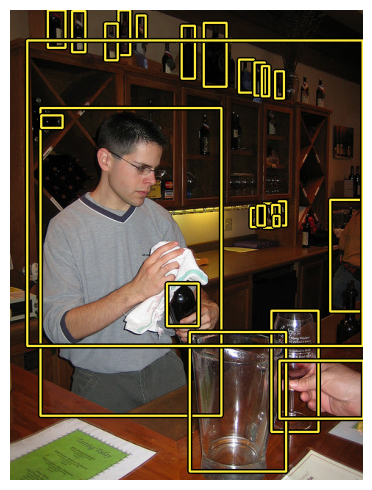

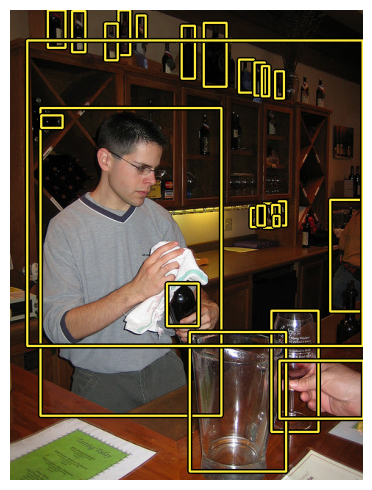

In [ ]:
img_id = str(img_ids[0])

image = Image.open(os.path.join(DATASET_FOLDER_PATH, IMAGE_FORLDER_PATH, images[img_id]['file_name']))
image = np.array([image])

img_instances = instances[img_id]
img_annotations = {
    'classes': [],
    'boxes': []
}
for instance in img_instances:
    img_annotations['classes'].append(instance['category_id'])
    img_annotations['boxes'].append(instance['bbox'])

img_annotations = {
    'boxes': np.array([img_annotations['boxes']]),
    'confidence': np.ones((1, len(img_annotations['boxes']))),
    'classes': np.array([img_annotations['classes']]),
    'num_detections': np.array([len(img_annotations['boxes'])])
}

visualization.plot_bounding_box_gallery(
    image,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=img_annotations,
    scale=5,
    font_scale=0.7,
    bounding_box_format='xywh'
)